<h1> Heart Disease Prediction </h1>

- Muhammad Ibad Saleem

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv('heart.csv')


## Exploratory Data Analysis Using Seaborn and Matplotlib

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(1025, 14)

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


[Text(0.5, 1.0, 'Resting Blood Pressure vs Age')]

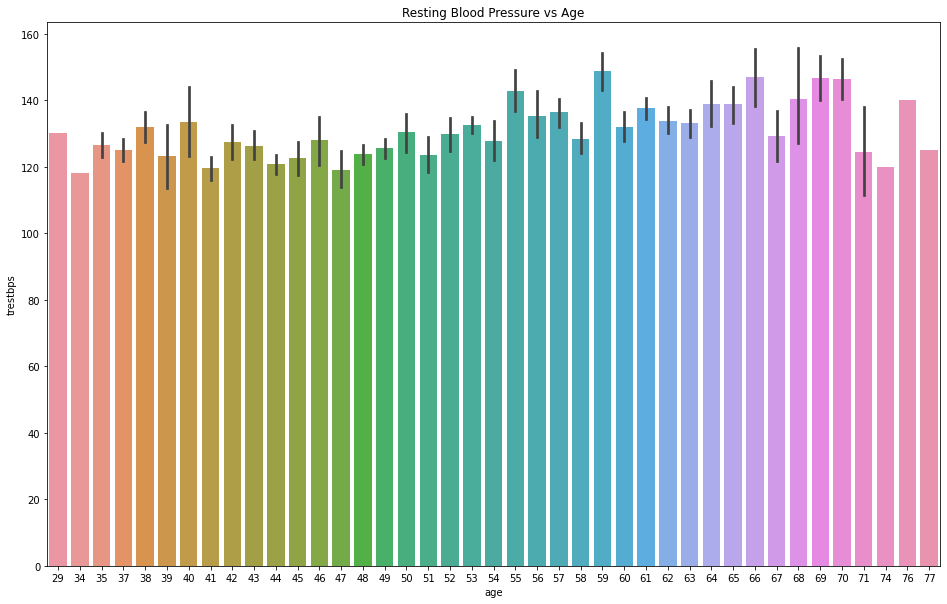

In [8]:
f,ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='age',y='trestbps', data=data)
ax.set(title='Resting Blood Pressure vs Age')


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

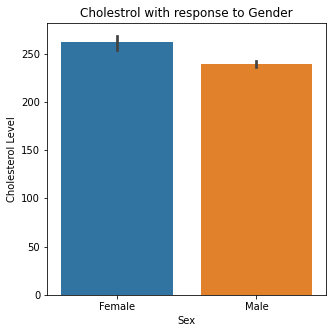

In [9]:
f,ax=plt.subplots(figsize=(5,5))
a=sns.barplot(x='sex',y='chol',data=data)
ax.set(title='Cholestrol with response to Gender',xlabel='Sex',ylabel='Cholesterol Level')
a.set_xticklabels(['Female','Male'])


[Text(0.5, 1.0, 'Heart Rate Achieved By Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Max Heart Rate Achieved')]

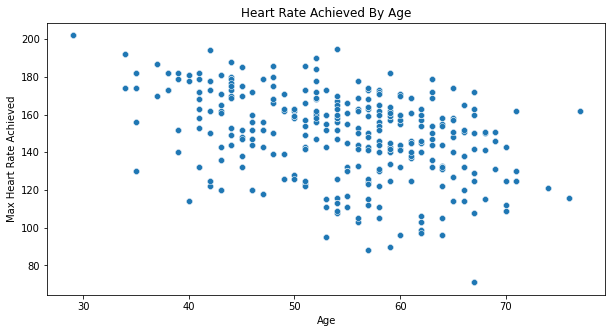

In [10]:
f,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='age',y='thalach',data=data)
ax.set(title='Heart Rate Achieved By Age',xlabel='Age',ylabel='Max Heart Rate Achieved')

In [11]:
df=data.copy()

In [12]:
chest0=df.loc[df['cp'] == 0]
chest1=df.loc[df['cp'] == 1]
chest2=df.loc[df['cp'] == 2]
chest3=df.loc[df['cp'] == 3]

In [13]:
arr=np.array([chest0['age'].count(),chest1['age'].count(),chest2['age'].count(),chest3['age'].count()])
arr

array([497, 167, 284,  77], dtype=int64)

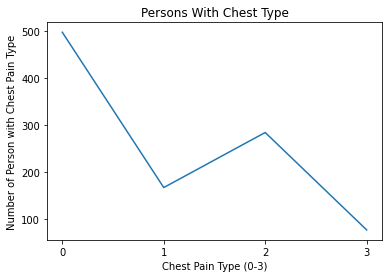

In [14]:
plt.plot(arr)
plt.title('Persons With Chest Type')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Number of Person with Chest Pain Type')
plt.xticks([0,1,2,3])
plt.show()

In [15]:
# thalach	exang

[Text(0.5, 0, 'Exercise Induced Angina'),
 Text(0, 0.5, 'Maximum Heart Rate Achieve'),
 Text(0.5, 1.0, 'Max Heart Rate Achieve vs Exercise Induced Angina')]

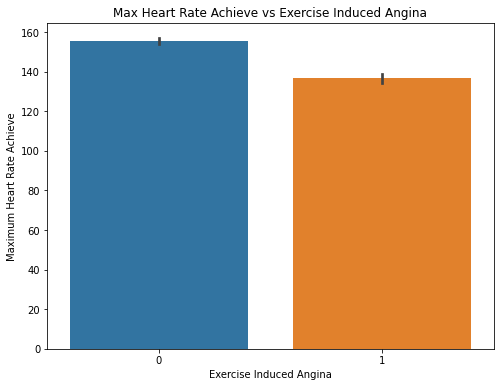

In [16]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='exang',y='thalach',data=data)
ax.set(xlabel='Exercise Induced Angina',ylabel='Maximum Heart Rate Achieve',title='Max Heart Rate Achieve vs Exercise Induced Angina')


[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Major Vessels'),
 Text(0.5, 1.0, 'Major Vessels Colored By Fluoroscopy')]

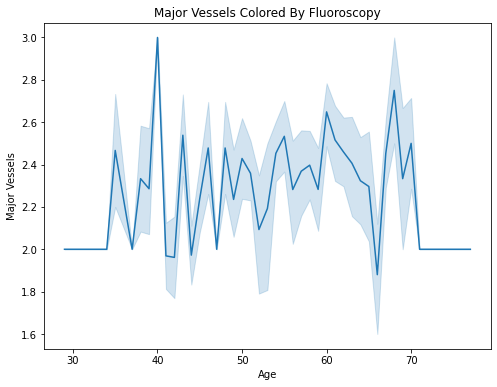

In [17]:
f,ax=plt.subplots(figsize=(8,6))

sns.lineplot(x='age',y='thal' ,data=data)
ax.set(xlabel='Age',ylabel='Major Vessels',title='Major Vessels Colored By Fluoroscopy')


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

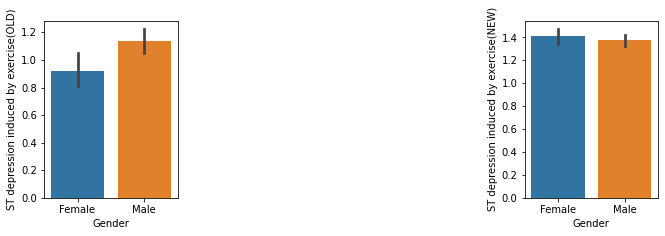

In [18]:
plt.subplots(figsize=(11,15))
ax=plt.subplot(4,4,1)
sns.barplot(x='sex',y='oldpeak',data=data)
ax.set(ylabel='ST depression induced by exercise(OLD)', xlabel='Gender')
ax.set_xticklabels(['Female','Male'])
ax=plt.subplot(4,4,4)
sns.barplot(x='sex',y='slope',data=data)
ax.set(ylabel='ST depression induced by exercise(NEW)', xlabel='Gender')
ax.set_xticklabels(['Female','Male'])


Text(0.5, 1.0, 'Cholesterol vs Blood Sugar Level > 120')

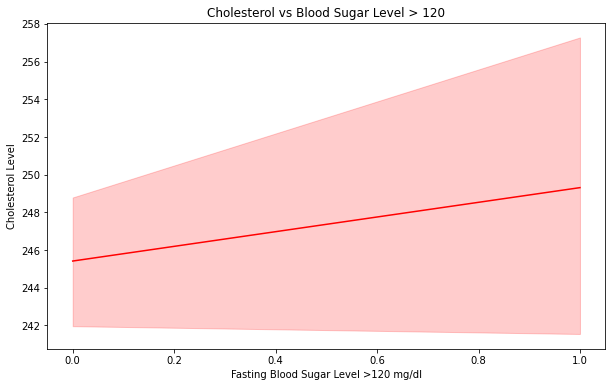

In [19]:
f,ax=plt.subplots(figsize=(10,6))
sns.lineplot(x='fbs',y='chol',data=data,color='red')
ax.set(xlabel='Fasting Blood Sugar Level >120 mg/dl',ylabel='Cholesterol Level')
ax.set_title('Cholesterol vs Blood Sugar Level > 120')

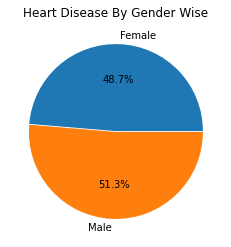

In [20]:
# f,ax=plt.subplots(figsize=(8,6))
# sns.barplot(x='target',y='sex',data=data)
# ax.set(xlabel='Exercise Induced Angina',ylabel='Maximum Heart Rate Achieve',title='Max Heart Rate Achieve vs Exercise Induced Angina')
heart_male=data.loc[data['sex']==1]
heart_male=data['target']
heart_female=data.loc[data['sex']==0]
heart_female=data['target']
arr_heart= np.array([heart_male,heart_female])
# plt.pie(data['target'])
x=data.loc[data['target']==0].count()
y=data.loc[data['target']==1].count()

arr=np.array([x[0],y[0]])
# plt.show
f,ax=plt.subplots()
ax.pie(arr,explode=[0,0.01],labels=['Female','Male'],autopct='%1.1f%%')
ax.set(title='Heart Disease By Gender Wise')
plt.show()

## Model Integration For Prediction - SVM (SVC)

- Achieved 83% Accuracy For the Prediction

In [44]:
X= data.drop(columns=['age','sex','target'],axis=1)

In [45]:
Y= data['target']

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X)

StandardScaler()

In [48]:
standardized_data = scaler.transform(X)

In [70]:
classifier = svm.SVC(kernel='linear')


SVC(kernel='linear')

In [50]:
X=standardized_data

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2) 

In [52]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [53]:
X_train_predict= classifier.predict(X_train)
X_test_predict= classifier.predict(X_test)

In [89]:
accuracy_testing_data_score = accuracy_score(X_test_predict,Y_test)
accuracy_training_data_score = accuracy_score(X_train_predict,Y_train)


In [61]:
print('Accuracy of our Testing Data: ',accuracy_testing_data_score*100,'%')

Accuracy of our Testing Data:  83.76623376623377 %


## Confusion Matrix

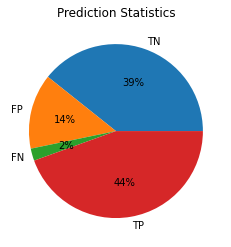

In [115]:
conf= confusion_matrix(Y_test,X_test_predict)
a=conf.ravel()
f,ax=plt.subplots()
ax.pie(a,labels=['TN','FP','FN','TP'],autopct='%1.0f%%')
ax.set(title='Prediction Statistics')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix For the Predicted vs Actual Value By SVM')

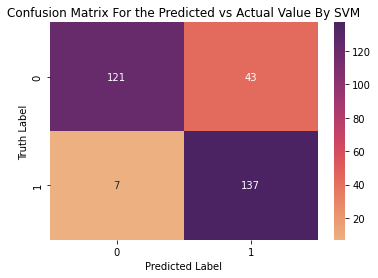

In [86]:
sns.heatmap(conf,annot=True,cmap='flare',fmt='d',cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.title('Confusion Matrix For the Predicted vs Actual Value By SVM')